###Downloading the Dataset via kaggle API

In [12]:
import kagglehub

path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashionmnist


### Setting Up the Tensorflow Environment

In [13]:
pip install tensorflow

### Loading and Visualizing the dataset

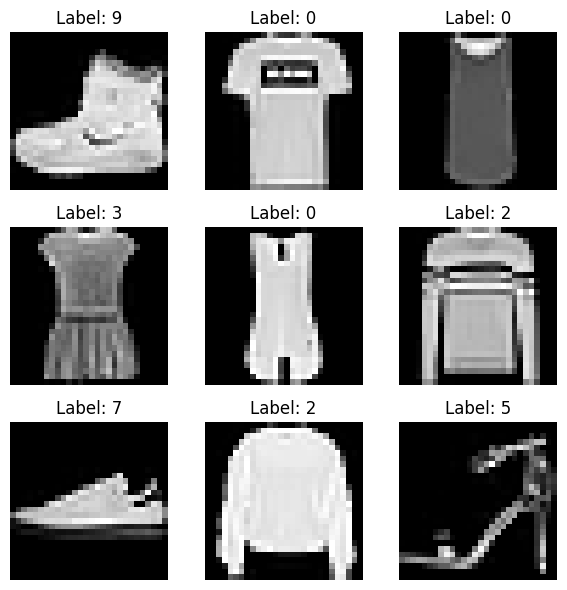

In [14]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray', interpolation='nearest')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


###Preprocessing the data

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


### CNN Build and Train

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape

model = Sequential([
    Reshape((28, 28, 1), input_shape=(28, 28)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.7678 - loss: 0.6386 - val_accuracy: 0.8750 - val_loss: 0.3451
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.8793 - loss: 0.3264 - val_accuracy: 0.8879 - val_loss: 0.3126
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.8971 - loss: 0.2838 - val_accuracy: 0.9006 - val_loss: 0.2747
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9081 - loss: 0.2453 - val_accuracy: 0.9034 - val_loss: 0.2619
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9160 - loss: 0.2210 - val_accuracy: 0.9074 - val_loss: 0.2506


### Evaluation

In [18]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9058 - loss: 0.2583
Test Accuracy: 0.91
